# Resume Screening


# **1. Importing the required libraries:**






In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# **2. Loading the desired resume dataset:**

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
df = pd.read_csv("resumedata1.csv")

In [ ]:
df

,Category,Resume
0,Data Science,Skills * Programming Languages: Python (pandas...
1,Data Science,Education Details \r\nMay 2013 to May 2017 B.E...
2,Data Science,"Areas of Interest Deep Learning, Control Syste..."
3,Data Science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,Data Science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
1996,hr,hr consultant summary detail oriented 25 years...
1997,hr,hr coordinator summary to obtain a challenging...
1998,hr,hr manager summary human resources professiona...
1999,hr,hr generalist summary human resource manager a...


# **3. Finding existing job categories:**




In [ ]:
df['Category'].value_counts()

Category
accountant                   118
engineering                  118
chef                         118
banking                      115
construction                 112
digital media                 96
Java Developer                84
Testing                       70
DevOps Engineer               55
devops engineer               55
Python Developer              48
Web Designing                 45
HR                            44
Hadoop                        42
Blockchain                    40
data science                  40
etl developer                 40
Data Science                  40
ETL Developer                 40
Mechanical Engineer           40
Operations Manager            40
Sales                         40
hr                            36
Arts                          36
database                      33
Database                      33
PMO                           30
Health and fitness            30
Electrical Engineering        30
electrical engineering        30
b

<Axes: xlabel='Category', ylabel='count'>

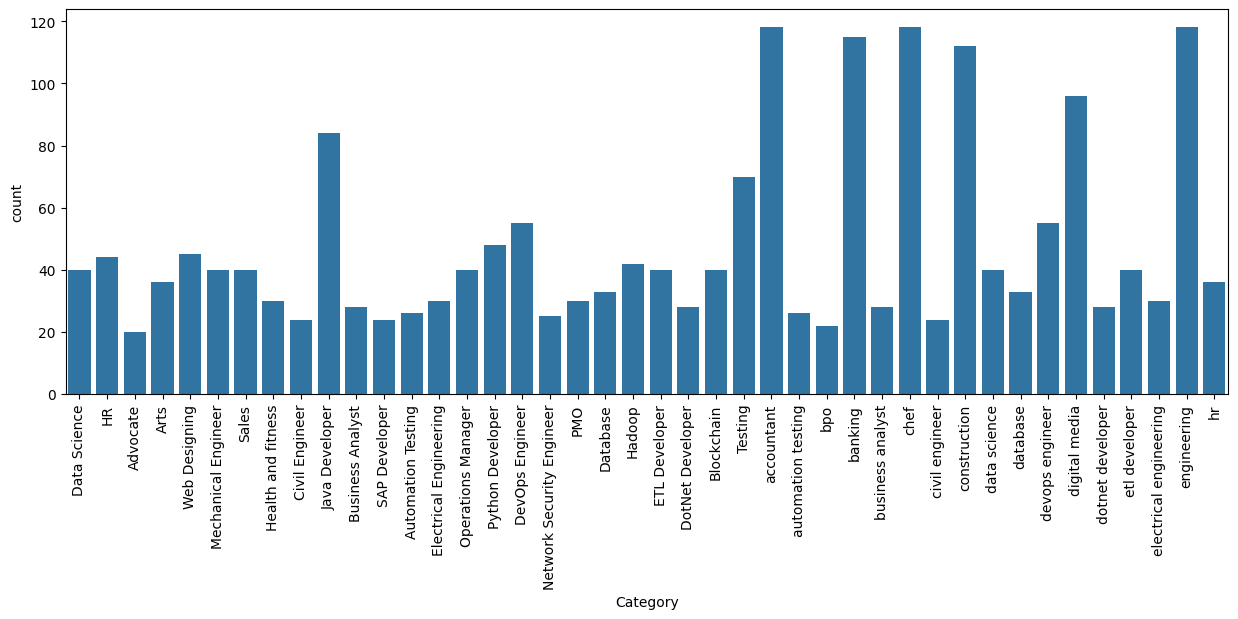

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(x="Category", data=df)

# **4. Removing redundant job categories**

In [ ]:
df['Category'] = df['Category'].str.lower().str.replace('_', ' ')
df.drop_duplicates(inplace=True)
df

,Category,Resume
0,data science,Skills * Programming Languages: Python (pandas...
1,data science,Education Details \r\nMay 2013 to May 2017 B.E...
2,data science,"Areas of Interest Deep Learning, Control Syste..."
3,data science,Skills â¢ R â¢ Python â¢ SAP HANA â¢ Table...
4,data science,"Education Details \r\n MCA YMCAUST, Faridab..."
...,...,...
1996,hr,hr consultant summary detail oriented 25 years...
1997,hr,hr coordinator summary to obtain a challenging...
1998,hr,hr manager summary human resources professiona...
1999,hr,hr generalist summary human resource manager a...


<Axes: xlabel='Category', ylabel='count'>

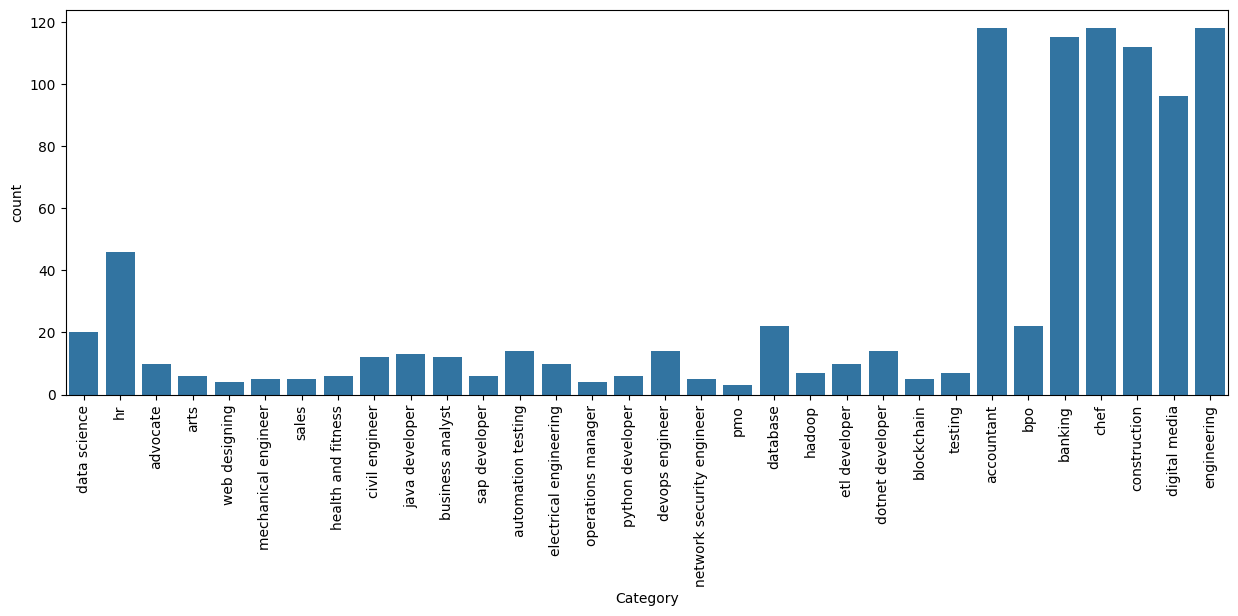

In [ ]:
plt.figure(figsize=(15,5))
plt.xticks(rotation=90)
sns.countplot(x="Category", data=df)

In [ ]:
df['Category'] = df['Category'].replace({'automation testing': 'testing'})
df['Category'] = df['Category'].replace({'database': 'database administrator'})
df['Category'] = df['Category'].replace({'construction': 'civil engineer'})
df['Category'] = df['Category'].replace({'bpo': 'business analyst'})
df['Category'] = df['Category'].replace({'data science': 'python developer'})
df['Category'] = df['Category'].replace({'operations manager': 'devops engineer'})
df['Category'] = df['Category'].replace({'devops engineer' : 'systems administrator'})
df['Category'] = df['Category'].replace({'accountant': 'banking'})
df['Category'] = df['Category'].replace({'dotnet developer': 'web developer'})
df['Category'] = df['Category'].replace({'web designing': 'web developer'})
df['Category'] = df['Category'].replace({'electrical engineering': 'engineer'})
df['Category'] = df['Category'].replace({'mechanical engineer': 'engineer'})
df['Category'] = df['Category'].replace({'civil engineer': 'engineer'})
df['Category'] = df['Category'].replace({'engineering': 'engineer'})
df['Category'] = df['Category'].replace({'etl developer': 'java developer'})
df['Category'] = df['Category'].replace({'hadoop': 'java developer'})
df['Category'] = df['Category'].replace({'health and fitness': 'healthcare'})
df['Category'] = df['Category'].replace({'network security engineer': 'security analyst'})
df['Category'] = df['Category'].replace({'information technology': 'software developer'})
df['Category'] = df['Category'].replace({'sap developer': 'software developer'})
df['Category'] = df['Category'].replace({'blockchain': 'software developer'})
df['Category'] = df['Category'].replace({'pmo': 'project manager'})
df['Category'] = df['Category'].replace({'business analyst': 'project manager'})
df['Category'] = df['Category'].replace({'digital media': 'arts'})
df['Category'] = df['Category'].replace({'chef': 'arts'})
df['Category'] = df['Category'].replace({'advocate': 'arts'})
df['Category'] = df['Category'].replace({'teacher': 'arts'})
df['Category'] = df['Category'].replace({'healthcare': 'arts'})
df['Category'] = df['Category'].replace({'hr': 'hr and sales'})
df['Category'] = df['Category'].replace({'sales': 'hr and sales'})
df['Category'] = df['Category'].replace({'testing': 'software developer'})
df['Category'].value_counts()

Category
engineer                  257
arts                      236
banking                   233
hr and sales               51
project manager            37
software developer         32
java developer             30
python developer           26
database administrator     22
web developer              18
systems administrator      18
security analyst            5
Name: count, dtype: int64

In [ ]:
category_counts = df['Category'].value_counts()

# Identify categories with counts less than 100
categories_to_drop = category_counts[category_counts < 100].index

# Drop rows with categories that have counts less than 100
df = df[~df['Category'].isin(categories_to_drop)]
df['Category'].value_counts()

Category
engineer    257
arts        236
banking     233
Name: count, dtype: int64

<Axes: xlabel='Category', ylabel='count'>

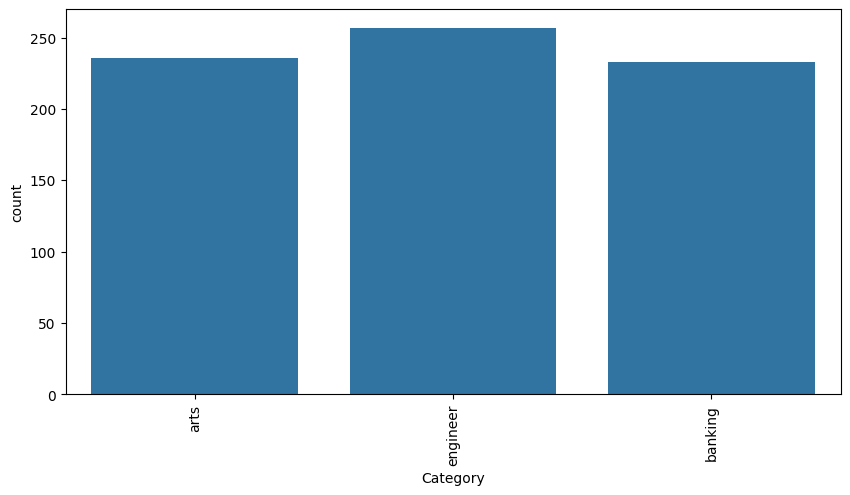

In [ ]:
plt.figure(figsize=(10,5))
plt.xticks(rotation=90)
sns.countplot(x="Category", data=df)

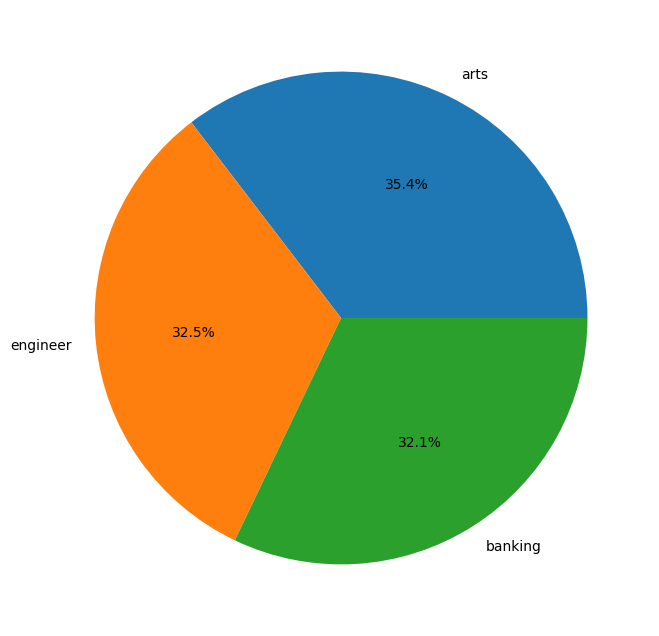

In [ ]:
counts = df['Category'].value_counts()
Category = df['Category'].unique()
plt.figure(figsize=(8,8))
plt.pie(counts,labels=Category,autopct='%1.1f%%')
plt.show()

# **5. Cleaning resume data**

In [ ]:
import re
def cleanResume(txt):
    cleanText = re.sub('http\S+\s', ' ', txt) #links
    cleanText = re.sub('#\S+\s', ' ', cleanText) #Hashtags
    cleanText = re.sub('@\S+', '  ', cleanText) #Handles
    cleanText = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', cleanText) #Punctuations
    cleanText = re.sub(r'[^\x00-\x7f]', ' ', cleanText)  #Special Characters
    cleanText = re.sub('\s+', ' ', cleanText) #Extra Whitespaces
    return cleanText

In [ ]:
df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))
df['Resume']

<ipython-input-29-b11d029cf4a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Resume'] = df['Resume'].apply(lambda x: cleanResume(x))


84      TECHNICAL QUALIFICATIONS Windows Ms OfficeEduc...
85      Education Details B Com LL B University of Cla...
86      Education Details LLB Dibrugarh University Adv...
87      Education Details November 2016 to January 201...
88      SKILLS Knows English as native speaker IELTS O...
                              ...                        
1960    engineering technician summary work as enginee...
1961    mechanical engineering tutor summary driven an...
1962    engineering technician field service professio...
1963    engineering intern personal summary age 22 yea...
1964    engineering assistant summary hard working rec...
Name: Resume, Length: 726, dtype: object

# **6. Label Encoding and Tf-Idf Vectorization**

In [ ]:
df['Category'].unique()

array(['arts', 'engineer', 'banking'], dtype=object)

In [ ]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
le.fit(df['Category'])
df['Category'] = le.transform(df['Category'])

<ipython-input-31-176cc21adfe6>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['Category'] = le.transform(df['Category'])


In [ ]:
df['Category'].unique()

array([0, 2, 1])

In [ ]:
from sklearn.feature_extraction.text import TfidfVectorizer
tfidf = TfidfVectorizer(stop_words='english')
tfidf.fit(df['Resume'])
requiredText  = tfidf.transform(df['Resume'])

# **7. Training the model**

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(requiredText, df['Category'], test_size=0.2)

In [ ]:
X_train.shape

(580, 21402)

In [ ]:
X_test.shape

(146, 21402)

In [ ]:
from sklearn.multiclass import OneVsRestClassifier #Multi-Category Classifier
from sklearn.metrics import accuracy_score #Prediction Score
from sklearn.metrics import classification_report #Prediction Score
from sklearn.neighbors import KNeighborsClassifier  # KNN Classifier

# Define and train the Random Forest classifier
clf = OneVsRestClassifier(KNeighborsClassifier())  # Using KNN Classifier instead of Random Forest Classifier

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.8698630136986302
              precision    recall  f1-score   support

           0       0.90      0.79      0.84        48
           1       0.86      0.86      0.86        50
           2       0.85      0.96      0.90        48

    accuracy                           0.87       146
   macro avg       0.87      0.87      0.87       146
weighted avg       0.87      0.87      0.87       146



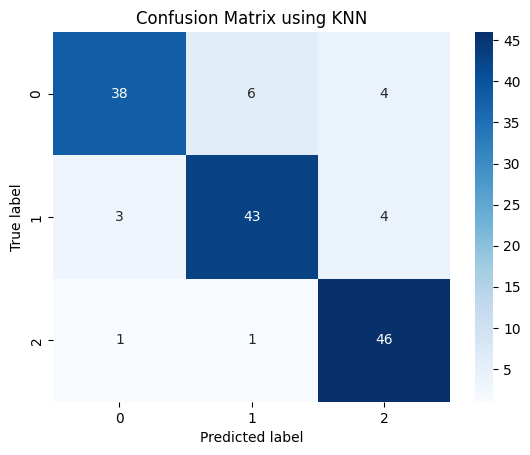

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix using KNN")
plt.show()

In [ ]:
from sklearn.multiclass import OneVsRestClassifier #Multi-Category Classifier
from sklearn.metrics import accuracy_score #Prediction Score
from sklearn.metrics import classification_report #Prediction Score
from sklearn.ensemble import RandomForestClassifier  # Random Forest Classifier

# Define and train the Random Forest classifier
clf = OneVsRestClassifier(RandomForestClassifier())  # Using RandomForestClassifier instead of KNeighborsClassifier

clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)
print(accuracy_score(y_test,y_pred))
print(classification_report(y_test,y_pred))

0.9383561643835616
              precision    recall  f1-score   support

           0       0.96      0.96      0.96        48
           1       0.96      0.88      0.92        50
           2       0.90      0.98      0.94        48

    accuracy                           0.94       146
   macro avg       0.94      0.94      0.94       146
weighted avg       0.94      0.94      0.94       146



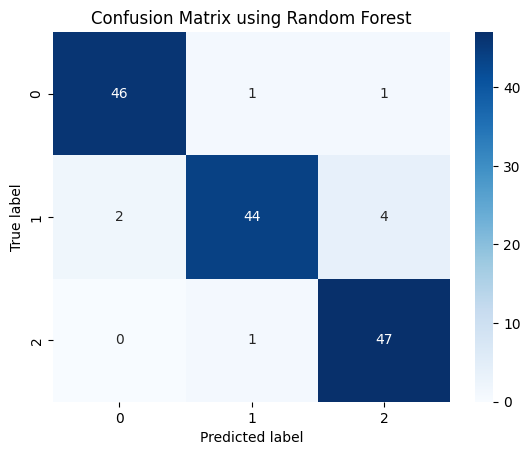

In [ ]:
from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test,y_pred)

sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted label")
plt.ylabel("True label")
plt.title("Confusion Matrix using Random Forest")
plt.show()


#**8. Resume Parser**



In [ ]:
!pip install tika

  Preparing metadata (setup.py) ... done
  Created wheel for tika: filename=tika-2.6.0-py3-none-any.whl size=32621 sha256=c4f1c2cc4a9f246363887aeb4d62526124aeb49de821a04cc60c304b4d5f40cb
  Stored in directory: /root/.cache/pip/wheels/5f/71/c7/b757709531121b1700cffda5b6b0d4aad095fb507ec84316d0
Successfully built tika


In [ ]:
from tika import parser
from functools import reduce
import pandas as pd

In [ ]:
file = r'Vinay_Resume.pdf'
file_data = parser.from_file(file)

In [ ]:
text = file_data['content']
print(text)






































Vinay Kumar
Surat, Gujarat

� 9340332405 # vk96154.20@gmail.com ï Vinay Kumar § github.com/kumar20vinay

Education

Indian Institute of Information Technology Surat, Gujarat 2021 – 2025

Bachelor of Technology in Computer Science and Engineering CGPA 8.23/10 Till 4th Sem

Experience

GDSC IIIT Surat July 2022 – July 2023

Junior Developer Surat, Gujarat

• Collaborated with over 30 other Junior Developer’s on various projects.

• Mentored more than 50 students during the Hackathons.

Project Work

ViseHousing | Machine Learning September 2023

• Predicting house prices using Linear Regression and Gradient Boosting Regressor.

• implemented using python libraries such as matplotlib, pandas and numpy.

TalkX | Javascript, React.js, Node.js, MongoDB, Socket.io July 2023

• Developed a sophisticated web app for chatting from scratch using the MERN stack (MongoDB, Express.js, React,
Node.js).

• Enabled real-time communication between users using socket.

In [ ]:
parsed_content = {}

In [ ]:
#E-MAIL
import re
def get_email_addresses(string):
    r = re.compile(r'[\w\.-]+@[\w\.-]+')
    return r.findall(string)

email = get_email_addresses(text)
emails = reduce(lambda re, x: re+[x] if x not in re else re, email, [])
print(emails)
parsed_content['E-mail'] = email

['vk96154.20@gmail.com']


In [ ]:
#PHONE NUMBER
import re
def get_phone_numbers(string):
    r = re.compile(r'(\d{3}[-\.\s]??\d{3}[-\.\s]??\d{4}|\(\d{3}\)\s*\d{3}[-\.\s]??\d{4}|\d{3}[-\.\s]??\d{4})')
    phone_numbers = r.findall(string)
    return [re.sub(r'\D', '', num) for num in phone_numbers]

phone_number= get_phone_numbers(text)
print(phone_number[0])


9340332405


In [ ]:
import spacy
nlp = spacy.load('en_core_web_sm')
from spacy.matcher import Matcher
matcher = Matcher(nlp.vocab)

def extract_name(text):
   nlp_text = nlp(text)

   # First name and Last name are always Proper Nouns
   pattern = [{'POS': 'PROPN'}, {'POS': 'PROPN'}]

   matcher.add('NAME', [pattern], on_match = None)

   matches = matcher(nlp_text)

   for match_id, start, end in matches:
       span = nlp_text[start:end]
       return span.text

name = extract_name(text)
print("Name:", name)
parsed_content['Name'] =  name

Name: Vinay Kumar


In [ ]:
Keywords = ["education",
            "summary",
            "accomplishments",
            "executive profile",
            "professional profile",
            "personal profile",
            "work background",
            "academic profile",
            "other activities",
            "qualifications",
            "experience",
            "interests",
            "skills",
            "achievements",
            "publications",
            "publication",
            "certifications",
            "workshops",
            "project work",
            "internships",
            "trainings",
            "hobbies",
            "overview",
            "objective",
            "position of responsibility",
            "jobs"
           ]

In [ ]:
text = text.replace("\n"," ")
text = text.replace("[^a-zA-Z0-9]", " ");
re.sub('\W+','', text)
text = text.lower()
print(text)

                                     vinay kumar surat, gujarat  � 9340332405 # vk96154.20@gmail.com ï vinay kumar § github.com/kumar20vinay  education  indian institute of information technology surat, gujarat 2021 – 2025  bachelor of technology in computer science and engineering cgpa 8.23/10 till 4th sem  experience  gdsc iiit surat july 2022 – july 2023  junior developer surat, gujarat  • collaborated with over 30 other junior developer’s on various projects.  • mentored more than 50 students during the hackathons.  project work  visehousing | machine learning september 2023  • predicting house prices using linear regression and gradient boosting regressor.  • implemented using python libraries such as matplotlib, pandas and numpy.  talkx | javascript, react.js, node.js, mongodb, socket.io july 2023  • developed a sophisticated web app for chatting from scratch using the mern stack (mongodb, express.js, react, node.js).  • enabled real-time communication between users using socket.

In [ ]:
content = {}
indices = []
keys = []
for key in Keywords:
    try:
        content[key] = text[text.index(key) + len(key):]
        indices.append(text.index(key))
        keys.append(key)
    except:
        pass


In [ ]:
#Sorting the indices
zipped_lists = zip(indices, keys)
sorted_pairs = sorted(zipped_lists)
sorted_pairs

tuples = zip(*sorted_pairs)
indices, keys = [ list(tuple) for tuple in  tuples]
keys

['education', 'experience', 'project work', 'skills', 'achievements']

In [ ]:
#Keeping the required content and removing the redundant part
content = []
for idx in range(len(indices)):
    if idx != len(indices)-1:
        content.append(text[indices[idx]: indices[idx+1]])
    else:
        content.append(text[indices[idx]: ])

In [ ]:
for i in range(len(indices)):
    parsed_content[keys[i]] = content[i]

In [ ]:
parsed_content['ImpData'] = ' '.join(parsed_content[column] for column in keys)

In [ ]:
print(parsed_content['ImpData'])

education  indian institute of information technology surat, gujarat 2021 – 2025  bachelor of technology in computer science and engineering cgpa 8.23/10 till 4th sem   experience  gdsc iiit surat july 2022 – july 2023  junior developer surat, gujarat  • collaborated with over 30 other junior developer’s on various projects.  • mentored more than 50 students during the hackathons.   project work  visehousing | machine learning september 2023  • predicting house prices using linear regression and gradient boosting regressor.  • implemented using python libraries such as matplotlib, pandas and numpy.  talkx | javascript, react.js, node.js, mongodb, socket.io july 2023  • developed a sophisticated web app for chatting from scratch using the mern stack (mongodb, express.js, react, node.js).  • enabled real-time communication between users using socket.io for instant responses.  • implemented secure user authentication and authorization mechanisms to protect user data and chat history.  • s

# **9. Prediction System**

In [ ]:
import pickle
pickle.dump(tfidf,open('tfidf.pkl','wb'))
pickle.dump(clf, open('clf.pkl', 'wb'))

In [ ]:
import re
def clean_resume(resume_text):
    clean_text = re.sub('http\S+\s*', ' ', resume_text)
    clean_text = re.sub('RT|cc', ' ', clean_text)
    clean_text = re.sub('#\S+', '', clean_text)
    clean_text = re.sub('@\S+', '  ', clean_text)
    clean_text = re.sub('[%s]' % re.escape("""!"#$%&'()*+,-./:;<=>?@[\]^_`{|}~"""), ' ', clean_text)
    clean_text = re.sub(r'[^\x00-\x7f]', r' ', clean_text)
    clean_text = re.sub('\s+', ' ', clean_text)
    return clean_text

In [ ]:
input_data = cleanResume(parsed_content['ImpData'])
input_features = tfidf.transform([input_data])
prediction_id = clf.predict(input_features)[0]

In [ ]:
import pickle

clf = pickle.load(open('clf.pkl', 'rb'))

cleaned_resume = cleanResume(parsed_content['ImpData'])

input_features = tfidf.transform([cleaned_resume])

prediction_id = clf.predict(input_features)[0]

Category_mapping = {
     0:"arts",
     2:"engineer",
     1:"banking"
}

Category_name = Category_mapping.get(prediction_id, "Unknown")

print("Predicted Category:", Category_name)

Predicted Category: engineer
